## Debugging

Image path: /root/dataset/val/ILSVRC2012_val_00030960.JPEG

In [26]:
# To handle relative importing
import os
import sys
module_paths = [
    os.path.abspath(os.path.join('..')),
]
for module_path in module_paths:
    if module_path not in sys.path:
        sys.path.append(module_path)

In [27]:
%load_ext autoreload
%autoreload 2
# import necessary files
from tqdm import tqdm
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
# dataloader
from src.dataloaders.dataloader import ImgNetDataset
from torch.utils.data import DataLoader
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# cropped images
cropped_imgs_path = '/root/CS570-Final-Project/testing/cropped_imgs'
# scores path
scores_path = '/root/CS570-Final-Project/testing/scores/scores.pkl'
# y_pred path
y_pred_path = '/root/CS570-Final-Project/testing/y_pred/y_pred.pkl'
# img_path
img_path = '/root/dataset/val/ILSVRC2012_val_00030960.JPEG'

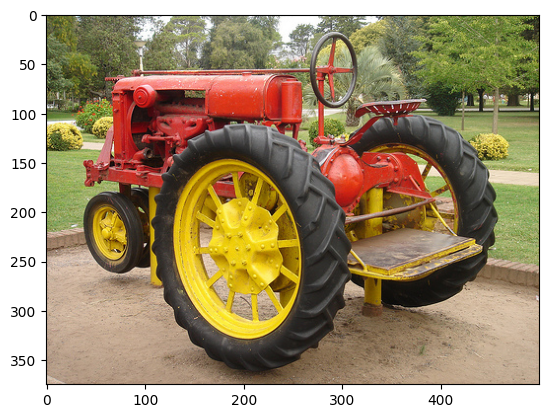

In [32]:
# visualize image
img = plt.imread(img_path)
plt.imshow(img)

In [36]:
# load scores from pickle file
scores = pickle.load(open(scores_path, 'rb'))
scores = torch.tensor(scores)
# load y_pred from pickle file
y_pred = pickle.load(open(y_pred_path, 'rb'))
y_pred = torch.tensor(y_pred)

/tmp/ipykernel_311797/3708809905.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scores = torch.tensor(scores)


In [41]:
scores.shape

torch.Size([16, 100, 1000])

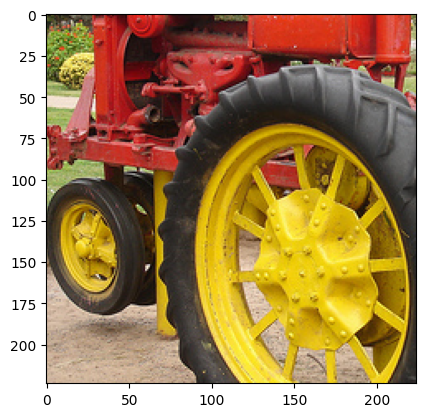

torch.return_types.max(
values=tensor([0.6802, 0.0633, 0.2271, 0.1840, 0.1086, 0.5492, 0.0366, 0.3291, 0.0591,
        0.1073, 0.1888, 0.2310, 0.3821, 0.3367, 0.1740, 0.1110, 0.1926, 0.0533,
        0.3360, 0.2237, 0.2740, 0.2136, 0.0548, 0.1071, 0.5842, 0.0842, 0.3217,
        0.0712, 0.8079, 0.1760, 0.0962, 0.1568, 0.3039, 0.1320, 0.0664, 0.1928,
        0.0751, 0.0799, 0.2964, 0.1616, 0.0222, 0.9016, 0.0899, 0.2773, 0.2845,
        0.0462, 0.2380, 0.0594, 0.4949, 0.0422, 0.1318, 0.6704, 0.0646, 0.2191,
        0.7634, 0.8434, 0.1011, 0.0327, 0.1595, 0.6460, 0.3070, 0.3573, 0.1819,
        0.2791, 0.1495, 0.1519, 0.5838, 0.0754, 0.5524, 0.3531, 0.8279, 0.3457,
        0.0990, 0.0554, 0.1505, 0.3332, 0.3454, 0.3615, 0.0355, 0.1748, 0.1772,
        0.1089, 0.1587, 0.5428, 0.0636, 0.0613, 0.1651, 0.1624, 0.1149, 0.5659,
        0.0667, 0.1707, 0.3989, 0.0304, 0.2763, 0.0277, 0.1047, 0.0683, 0.1293,
        0.0970]),
indices=tensor([456, 841, 912, 370, 212, 428, 674, 591, 879,   1, 311, 

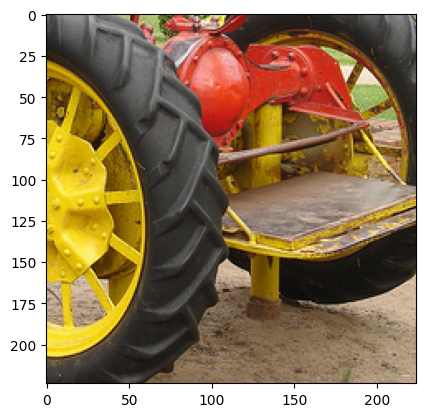

torch.return_types.max(
values=tensor([0.2536, 0.3578, 0.0437, 0.2008, 0.1557, 0.1893, 0.6071, 0.1141, 0.3186,
        0.9255, 0.4448, 0.1723, 0.1014, 0.1653, 0.1989, 0.1884, 0.0690, 0.3306,
        0.0846, 0.1358, 0.2987, 0.0257, 0.1714, 0.1526, 0.5301, 0.3064, 0.0508,
        0.0957, 0.2104, 0.3183, 0.1138, 0.1455, 0.5198, 0.2202, 0.0960, 0.0810,
        0.0884, 0.3278, 0.2851, 0.0577, 0.0894, 0.1069, 0.0926, 0.2124, 0.1733,
        0.0788, 0.0543, 0.3297, 0.1066, 0.1810, 0.5326, 0.0580, 0.1564, 0.0629,
        0.3973, 0.1557, 0.2986, 0.3010, 0.2741, 0.6319, 0.1873, 0.1575, 0.4942,
        0.2994, 0.0314, 0.2235, 0.1148, 0.2019, 0.0260, 0.1991, 0.5001, 0.4211,
        0.3138, 0.2914, 0.1478, 0.3034, 0.5093, 0.0986, 0.0493, 0.1108, 0.0781,
        0.2196, 0.2792, 0.4711, 0.0988, 0.0786, 0.1218, 0.2047, 0.3516, 0.2739,
        0.0798, 0.7208, 0.2036, 0.1421, 0.4811, 0.1252, 0.1095, 0.1879, 0.1398,
        0.1588]),
indices=tensor([760, 971, 750, 554, 364, 811, 816, 367,  95, 111, 890, 

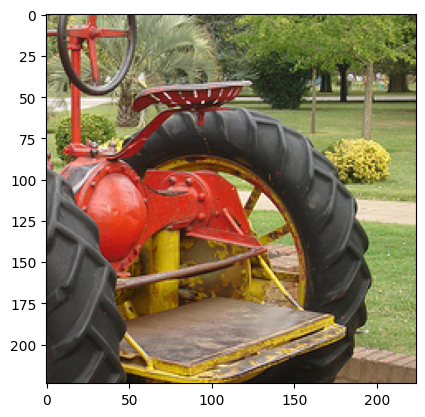

torch.return_types.max(
values=tensor([0.2283, 0.1292, 0.1607, 0.3331, 0.4729, 0.0749, 0.1894, 0.1633, 0.1410,
        0.0388, 0.8084, 0.1057, 0.2971, 0.4856, 0.2031, 0.0572, 0.0753, 0.1634,
        0.1032, 0.2234, 0.1136, 0.1861, 0.0750, 0.1257, 0.3064, 0.3624, 0.0995,
        0.1683, 0.1593, 0.2875, 0.0914, 0.2236, 0.0817, 0.7194, 0.1529, 0.2542,
        0.1245, 0.1045, 0.3669, 0.6890, 0.1362, 0.2878, 0.1085, 0.2318, 0.0728,
        0.0433, 0.1603, 0.0561, 0.1034, 0.2497, 0.1072, 0.1208, 0.4251, 0.2256,
        0.0993, 0.1493, 0.1772, 0.0665, 0.3039, 0.0758, 0.2206, 0.5958, 0.2076,
        0.3806, 0.0871, 0.1887, 0.0671, 0.2710, 0.0531, 0.1688, 0.1053, 0.5836,
        0.1109, 0.1940, 0.1114, 0.4003, 0.2033, 0.3779, 0.5210, 0.2488, 0.0844,
        0.0378, 0.0670, 0.3381, 0.2616, 0.1002, 0.2509, 0.9034, 0.0280, 0.1262,
        0.1722, 0.0984, 0.1087, 0.1281, 0.3467, 0.2932, 0.0768, 0.1180, 0.2268,
        0.1298]),
indices=tensor([463, 523, 396, 987, 750, 554, 931, 674, 696, 518, 434, 

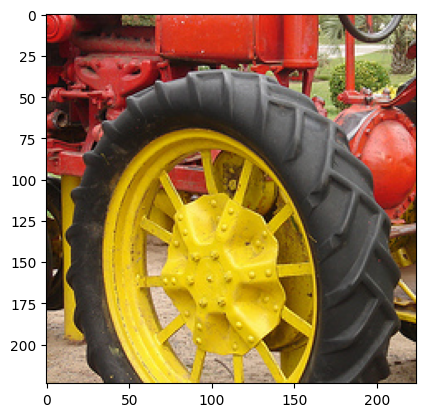

torch.return_types.max(
values=tensor([0.3864, 0.1796, 0.2305, 0.1183, 0.0725, 0.3223, 0.0556, 0.7187, 0.1941,
        0.1215, 0.2734, 0.2252, 0.0890, 0.0407, 0.1604, 0.7240, 0.1733, 0.0661,
        0.1857, 0.1530, 0.5121, 0.2389, 0.0730, 0.2513, 0.1320, 0.2793, 0.0426,
        0.3763, 0.0760, 0.3680, 0.6191, 0.1315, 0.0711, 0.2531, 0.1617, 0.0400,
        0.3013, 0.0752, 0.2165, 0.1384, 0.0896, 0.1390, 0.3471, 0.2958, 0.6709,
        0.1650, 0.1003, 0.1879, 0.4570, 0.4705, 0.1939, 0.2568, 0.1158, 0.3443,
        0.2055, 0.2486, 0.5456, 0.0955, 0.1253, 0.0604, 0.0721, 0.6577, 0.4229,
        0.1144, 0.1217, 0.0760, 0.0511, 0.0993, 0.2315, 0.1439, 0.1394, 0.2686,
        0.1229, 0.0870, 0.7426, 0.1974, 0.0817, 0.0661, 0.0533, 0.0859, 0.9253,
        0.3608, 0.1472, 0.1584, 0.1464, 0.2333, 0.0512, 0.1472, 0.2930, 0.3694,
        0.2325, 0.0806, 0.1468, 0.0587, 0.2009, 0.2050, 0.3754, 0.2442, 0.2294,
        0.1056]),
indices=tensor([363, 466, 999, 775, 123, 960, 565, 313, 803, 596, 490, 

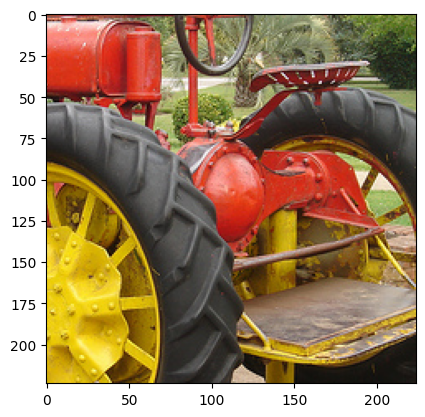

torch.return_types.max(
values=tensor([0.3505, 0.1118, 0.3360, 0.2645, 0.2124, 0.1916, 0.1703, 0.1261, 0.0401,
        0.3535, 0.1038, 0.6361, 0.8641, 0.0298, 0.2583, 0.2448, 0.1024, 0.5503,
        0.2381, 0.4272, 0.0298, 0.2447, 0.4027, 0.4068, 0.4227, 0.0683, 0.2367,
        0.1174, 0.1415, 0.1871, 0.6551, 0.2793, 0.8988, 0.3922, 0.1068, 0.3030,
        0.1126, 0.0630, 0.2464, 0.0969, 0.0418, 0.3623, 0.9959, 0.4452, 0.1264,
        0.1702, 0.1554, 0.0628, 0.1635, 0.1295, 0.2531, 0.0529, 0.2925, 0.1966,
        0.3556, 0.5950, 0.2755, 0.1005, 0.0722, 0.0779, 0.0543, 0.0557, 0.3365,
        0.3418, 0.5296, 0.1449, 0.0470, 0.3110, 0.0216, 0.7857, 0.1886, 0.0751,
        0.0439, 0.1452, 0.3914, 0.2056, 0.2353, 0.0307, 0.2278, 0.0601, 0.3110,
        0.0283, 0.0392, 0.1448, 0.1709, 0.0579, 0.2458, 0.3445, 0.0655, 0.0861,
        0.0915, 0.3467, 0.0814, 0.9842, 0.2249, 0.2770, 0.4448, 0.2579, 0.0728,
        0.3448]),
indices=tensor([539, 619, 766, 840, 704, 611, 133, 574, 163, 547, 651, 

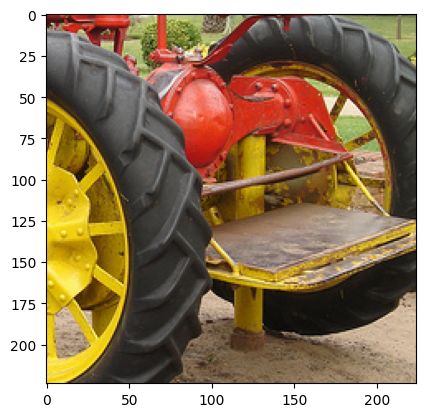

torch.return_types.max(
values=tensor([0.2785, 0.1551, 0.0629, 0.2591, 0.2269, 0.2035, 0.0840, 0.1107, 0.5409,
        0.0670, 0.8348, 0.3801, 0.0605, 0.2557, 0.2114, 0.1051, 0.2272, 0.3364,
        0.1959, 0.1868, 0.0758, 0.0421, 0.8669, 0.3195, 0.0941, 0.5078, 0.6260,
        0.0766, 0.2956, 0.3713, 0.0920, 0.0706, 0.1015, 0.1250, 0.1071, 0.1648,
        0.1948, 0.1187, 0.0932, 0.9601, 0.3404, 0.1245, 0.1685, 0.1922, 0.1523,
        0.1297, 0.1595, 0.2468, 0.1072, 0.6483, 0.0875, 0.1680, 0.1160, 0.6893,
        0.3116, 0.7181, 0.1168, 0.3369, 0.0610, 0.0755, 0.5164, 0.2182, 0.1384,
        0.1809, 0.3830, 0.2430, 0.0828, 0.3202, 0.1935, 0.5261, 0.4270, 0.1244,
        0.4955, 0.1331, 0.3301, 0.1563, 0.3881, 0.1078, 0.0872, 0.1273, 0.0870,
        0.0686, 0.6750, 0.0760, 0.0681, 0.3334, 0.2024, 0.1446, 0.4408, 0.1205,
        0.0819, 0.7729, 0.0961, 0.2573, 0.1379, 0.3298, 0.1837, 0.4445, 0.8751,
        0.2481]),
indices=tensor([693, 431, 636,  75, 409, 850, 544, 353, 891, 346, 772, 

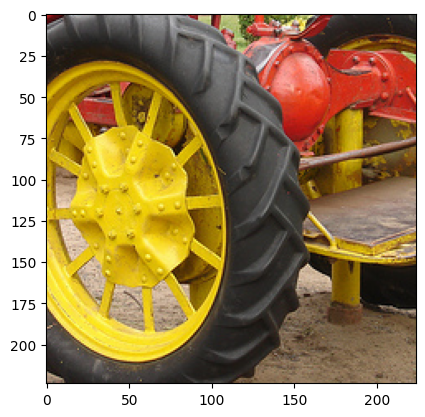

torch.return_types.max(
values=tensor([0.1108, 0.0627, 0.2776, 0.1843, 0.3415, 0.2708, 0.3901, 0.1351, 0.1911,
        0.0853, 0.0838, 0.5663, 0.1926, 0.1667, 0.0970, 0.2036, 0.1464, 0.4145,
        0.1587, 0.2368, 0.0928, 0.2792, 0.1721, 0.2042, 0.1322, 0.2492, 0.3880,
        0.2043, 0.2049, 0.3123, 0.1855, 0.5555, 0.2300, 0.6062, 0.0774, 0.1160,
        0.0657, 0.2027, 0.3614, 0.1512, 0.1853, 0.1089, 0.0746, 0.0693, 0.2767,
        0.0394, 0.1236, 0.1398, 0.1875, 0.4320, 0.1743, 0.8512, 0.1707, 0.0611,
        0.1160, 0.0921, 0.0869, 0.0921, 0.1239, 0.1351, 0.3980, 0.0464, 0.1754,
        0.0834, 0.2631, 0.1833, 0.2356, 0.1717, 0.2888, 0.0797, 0.1086, 0.0570,
        0.0539, 0.0807, 0.0932, 0.0731, 0.1403, 0.4152, 0.1591, 0.4217, 0.2554,
        0.1947, 0.4067, 0.0238, 0.1106, 0.8249, 0.1946, 0.7981, 0.2062, 0.1686,
        0.1187, 0.1932, 0.1114, 0.1098, 0.0774, 0.2869, 0.0673, 0.1088, 0.7210,
        0.1259]),
indices=tensor([862,  96, 918, 899, 953, 911, 119, 491, 903, 164, 701, 

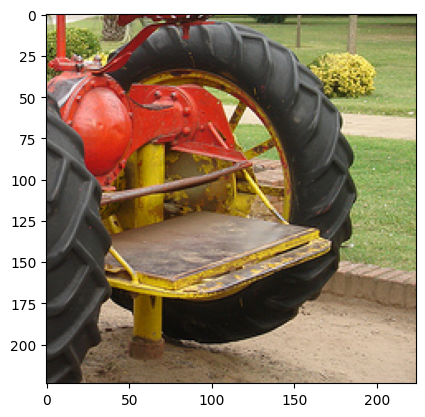

torch.return_types.max(
values=tensor([0.1507, 0.3207, 0.1026, 0.1323, 0.1792, 0.3220, 0.2761, 0.0604, 0.1441,
        0.1475, 0.4835, 0.1166, 0.1218, 0.0761, 0.0632, 0.1855, 0.0831, 0.0850,
        0.0415, 0.4253, 0.1969, 0.3072, 0.4567, 0.0978, 0.1332, 0.3092, 0.1096,
        0.1328, 0.0701, 0.2172, 0.1809, 0.4831, 0.2068, 0.1619, 0.1480, 0.0876,
        0.0853, 0.0698, 0.2144, 0.1197, 0.0766, 0.1273, 0.1440, 0.1712, 0.3878,
        0.4508, 0.2271, 0.6217, 0.2126, 0.0673, 0.9744, 0.1037, 0.2745, 0.2050,
        0.4505, 0.3623, 0.0957, 0.0968, 0.0458, 0.1331, 0.3970, 0.1626, 0.0905,
        0.7830, 0.1032, 0.1292, 0.3317, 0.3474, 0.4193, 0.1615, 0.4935, 0.1800,
        0.0323, 0.1736, 0.1423, 0.1233, 0.4587, 0.1378, 0.1736, 0.1677, 0.0239,
        0.1703, 0.1476, 0.2223, 0.2564, 0.3397, 0.0673, 0.5211, 0.2124, 0.1075,
        0.2310, 0.0396, 0.0928, 0.1071, 0.7442, 0.4352, 0.1993, 0.0959, 0.2381,
        0.0547]),
indices=tensor([299, 312, 862, 787, 574, 942, 533, 804, 922, 823, 332, 

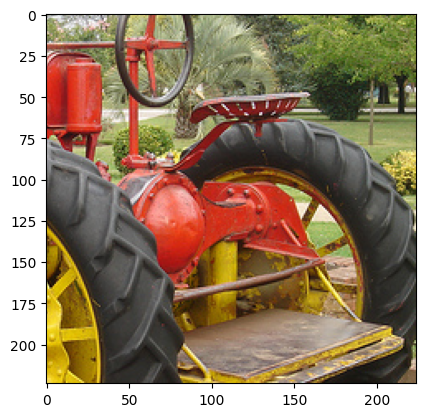

torch.return_types.max(
values=tensor([0.2634, 0.2610, 0.5552, 0.0450, 0.6004, 0.2621, 0.1102, 0.0700, 0.0722,
        0.2314, 0.5355, 0.2412, 0.4321, 0.3132, 0.0806, 0.3480, 0.0507, 0.3296,
        0.2559, 0.1558, 0.1048, 0.5310, 0.3300, 0.1411, 0.1472, 0.2015, 0.0810,
        0.6122, 0.1303, 0.2938, 0.0942, 0.4900, 0.1148, 0.1760, 0.6580, 0.2495,
        0.0801, 0.1901, 0.4491, 0.0463, 0.0918, 0.3295, 0.0681, 0.6372, 0.1699,
        0.5172, 0.2544, 0.2598, 0.1898, 0.4032, 0.0407, 0.0518, 0.0713, 0.3431,
        0.0998, 0.2962, 0.2908, 0.2741, 0.7397, 0.1144, 0.2015, 0.1096, 0.8486,
        0.4885, 0.0600, 0.0667, 0.0459, 0.3415, 0.0732, 0.1246, 0.2285, 0.0218,
        0.1809, 0.1345, 0.0458, 0.0439, 0.0992, 0.2886, 0.2868, 0.0742, 0.1024,
        0.2472, 0.3434, 0.0938, 0.0881, 0.0806, 0.4186, 0.1429, 0.1123, 0.1583,
        0.0490, 0.1393, 0.0462, 0.0614, 0.0598, 0.4324, 0.0553, 0.0395, 0.4045,
        0.2430]),
indices=tensor([122, 356,  74, 163, 980, 165, 772, 100, 412,  94, 419, 

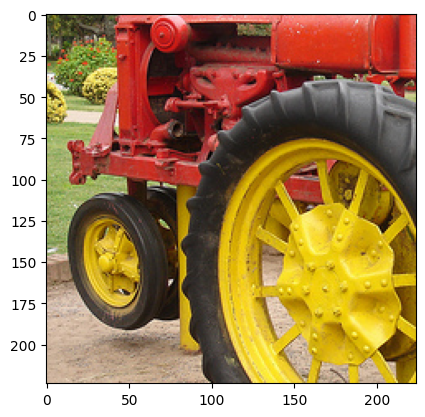

torch.return_types.max(
values=tensor([0.2391, 0.3853, 0.0496, 0.0557, 0.2964, 0.0871, 0.1880, 0.1313, 0.1233,
        0.1387, 0.2161, 0.2011, 0.1098, 0.7649, 0.0542, 0.2772, 0.1224, 0.1390,
        0.1206, 0.0715, 0.0975, 0.1571, 0.9609, 0.0724, 0.1016, 0.0886, 0.2192,
        0.1065, 0.0366, 0.0591, 0.0792, 0.6021, 0.7403, 0.6276, 0.1573, 0.1015,
        0.0752, 0.5072, 0.7792, 0.2944, 0.0926, 0.2163, 0.2356, 0.0518, 0.1961,
        0.3134, 0.1929, 0.0479, 0.1934, 0.1412, 0.1064, 0.2652, 0.2839, 0.3037,
        0.1331, 0.1034, 0.0654, 0.4655, 0.3174, 0.1511, 0.2612, 0.4801, 0.0664,
        0.0567, 0.0572, 0.0734, 0.0450, 0.1655, 0.0800, 0.0952, 0.3028, 0.0649,
        0.1632, 0.0691, 0.3593, 0.1091, 0.0498, 0.3296, 0.1651, 0.0970, 0.1435,
        0.3955, 0.5888, 0.9366, 0.0564, 0.2301, 0.1017, 0.0627, 0.3616, 0.2133,
        0.2534, 0.1848, 0.7637, 0.0963, 0.0585, 0.2082, 0.0877, 0.2448, 0.1075,
        0.2847]),
indices=tensor([469, 541,  35, 704, 579, 176, 514, 254, 536, 434, 852, 

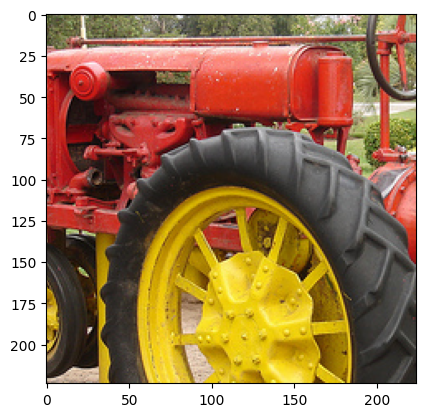

torch.return_types.max(
values=tensor([0.0691, 0.0692, 0.0995, 0.2338, 0.2818, 0.3052, 0.1422, 0.0824, 0.4000,
        0.3384, 0.0697, 0.2247, 0.2386, 0.1844, 0.1898, 0.0799, 0.0646, 0.5931,
        0.0576, 0.1717, 0.1369, 0.2500, 0.1446, 0.1973, 0.4956, 0.1239, 0.2562,
        0.1163, 0.0992, 0.1657, 0.0297, 0.7386, 0.1053, 0.0900, 0.0895, 0.1180,
        0.7028, 0.0709, 0.1112, 0.4867, 0.0855, 0.3197, 0.0976, 0.2449, 0.2842,
        0.2885, 0.1553, 0.1414, 0.6575, 0.4131, 0.1134, 0.2272, 0.0415, 0.1228,
        0.3403, 0.0921, 0.2382, 0.4070, 0.1814, 0.0994, 0.4616, 0.1877, 0.3094,
        0.4837, 0.4601, 0.3811, 0.6974, 0.1684, 0.0543, 0.8906, 0.1422, 0.2946,
        0.7694, 0.2473, 0.1228, 0.0509, 0.1357, 0.3425, 0.1266, 0.8538, 0.0624,
        0.2276, 0.6632, 0.1291, 0.1924, 0.3487, 0.0513, 0.3621, 0.1371, 0.0660,
        0.3651, 0.0828, 0.2204, 0.1660, 0.1119, 0.2064, 0.0889, 0.5206, 0.1965,
        0.2417]),
indices=tensor([885, 267, 119, 808, 514, 818, 472, 367, 911, 822, 635, 

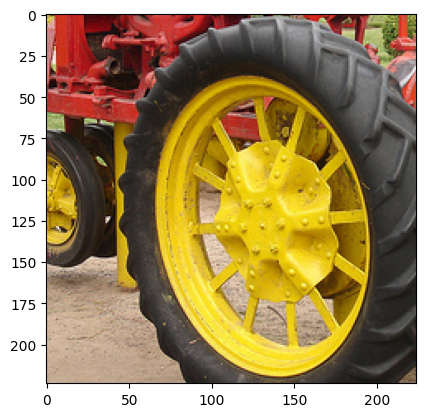

torch.return_types.max(
values=tensor([0.1269, 0.5752, 0.3274, 0.1098, 0.3608, 0.1594, 0.1113, 0.1156, 0.1068,
        0.1003, 0.7951, 0.2376, 0.0870, 0.0956, 0.4874, 0.0825, 0.1142, 0.1085,
        0.1228, 0.1553, 0.1885, 0.4081, 0.1893, 0.1347, 0.0777, 0.6428, 0.0671,
        0.2562, 0.1956, 0.1971, 0.0918, 0.1113, 0.3876, 0.1680, 0.4960, 0.3412,
        0.1922, 0.0665, 0.1676, 0.2310, 0.1863, 0.1279, 0.3819, 0.2696, 0.0422,
        0.3212, 0.2585, 0.1201, 0.2758, 0.5958, 0.1106, 0.2187, 0.0852, 0.1137,
        0.0416, 0.3292, 0.0840, 0.2926, 0.1851, 0.0766, 0.2655, 0.3155, 0.0934,
        0.0407, 0.1767, 0.3274, 0.2760, 0.0605, 0.0568, 0.2269, 0.1874, 0.1206,
        0.1330, 0.1295, 0.2694, 0.0986, 0.1388, 0.1217, 0.0898, 0.1287, 0.1586,
        0.0888, 0.1042, 0.1824, 0.0591, 0.1832, 0.0803, 0.0870, 0.2029, 0.3357,
        0.5473, 0.1863, 0.0729, 0.1563, 0.3980, 0.1531, 0.2915, 0.6205, 0.0863,
        0.0829]),
indices=tensor([376, 774, 860, 889, 433, 860, 667, 942, 519, 868, 850, 

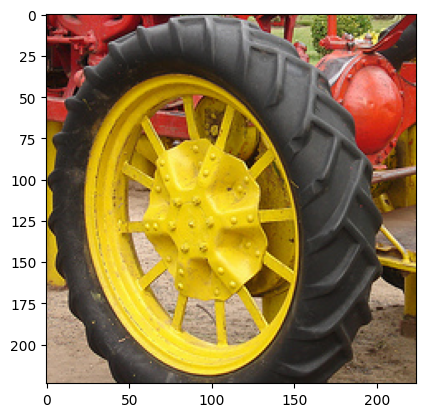

torch.return_types.max(
values=tensor([0.1454, 0.2840, 0.2203, 0.2676, 0.4018, 0.0515, 0.1203, 0.0569, 0.0317,
        0.7150, 0.9466, 0.1916, 0.0749, 0.1166, 0.1180, 0.6574, 0.1985, 0.1875,
        0.2818, 0.6524, 0.1699, 0.1624, 0.8450, 0.1889, 0.1335, 0.0979, 0.1811,
        0.2525, 0.0862, 0.4521, 0.4545, 0.1485, 0.3744, 0.1915, 0.3965, 0.0702,
        0.0920, 0.2874, 0.2697, 0.1448, 0.1044, 0.2683, 0.0513, 0.1446, 0.0741,
        0.2103, 0.0928, 0.0929, 0.3930, 0.2187, 0.0444, 0.0479, 0.3892, 0.3855,
        0.4122, 0.2745, 0.0524, 0.2332, 0.3434, 0.0800, 0.0817, 0.2792, 0.0859,
        0.0509, 0.2538, 0.1028, 0.2009, 0.1090, 0.0434, 0.1363, 0.0958, 0.3955,
        0.1597, 0.6126, 0.1130, 0.2486, 0.0640, 0.0739, 0.1172, 0.4797, 0.1269,
        0.2810, 0.2416, 0.1177, 0.1233, 0.0900, 0.2242, 0.3425, 0.2449, 0.0668,
        0.3880, 0.4746, 0.7086, 0.2589, 0.1104, 0.1724, 0.6642, 0.1066, 0.1183,
        0.7403]),
indices=tensor([117, 447, 863, 714,  68, 733, 851, 790, 448,  33, 415, 

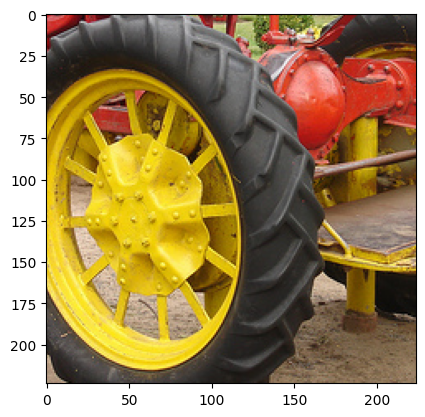

torch.return_types.max(
values=tensor([0.1332, 0.2907, 0.2385, 0.0192, 0.0806, 0.6861, 0.1420, 0.1142, 0.1819,
        0.3692, 0.0780, 0.1333, 0.0992, 0.6919, 0.1786, 0.3743, 0.6910, 0.1438,
        0.2312, 0.1619, 0.3617, 0.0635, 0.1535, 0.6332, 0.1797, 0.2297, 0.0521,
        0.3197, 0.5027, 0.2529, 0.3395, 0.0447, 0.1185, 0.2502, 0.1274, 0.0499,
        0.0718, 0.3507, 0.2142, 0.0971, 0.2994, 0.0834, 0.1495, 0.3273, 0.1951,
        0.0533, 0.1342, 0.1961, 0.1496, 0.0473, 0.2471, 0.1064, 0.2072, 0.0872,
        0.1972, 0.4201, 0.2465, 0.1300, 0.1274, 0.7816, 0.2208, 0.6618, 0.1245,
        0.1170, 0.1710, 0.1847, 0.0631, 0.1077, 0.0592, 0.2003, 0.2025, 0.2245,
        0.0697, 0.8785, 0.1536, 0.5767, 0.1644, 0.1212, 0.1856, 0.4046, 0.0836,
        0.1755, 0.0814, 0.7385, 0.1272, 0.3162, 0.2298, 0.2505, 0.0965, 0.1849,
        0.1327, 0.0299, 0.0737, 0.1388, 0.6473, 0.1254, 0.3952, 0.0422, 0.1706,
        0.1099]),
indices=tensor([176, 611, 943, 589, 585, 136, 733, 670, 438, 626, 234, 

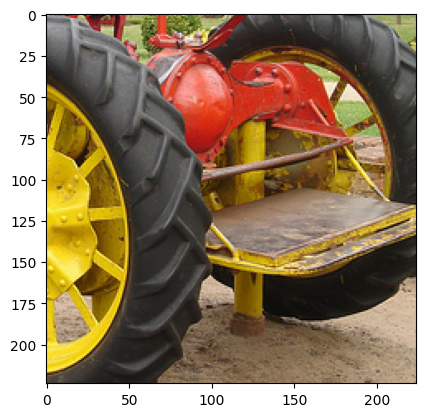

torch.return_types.max(
values=tensor([0.1197, 0.3660, 0.1678, 0.2395, 0.1185, 0.0259, 0.0645, 0.0854, 0.1350,
        0.0657, 0.0341, 0.2362, 0.1800, 0.0500, 0.0762, 0.3472, 0.0928, 0.3603,
        0.1232, 0.4128, 0.1349, 0.1895, 0.0490, 0.1012, 0.1215, 0.2293, 0.1421,
        0.0613, 0.3528, 0.1244, 0.0784, 0.0998, 0.0760, 0.0871, 0.0888, 0.3582,
        0.1704, 0.5534, 0.0872, 0.1109, 0.2145, 0.1472, 0.7461, 0.2449, 0.1124,
        0.1332, 0.5979, 0.0880, 0.4956, 0.0722, 0.0947, 0.1125, 0.2422, 0.2177,
        0.2771, 0.0602, 0.0475, 0.0831, 0.0600, 0.0738, 0.1544, 0.0945, 0.1152,
        0.5922, 0.5069, 0.0909, 0.1442, 0.0657, 0.4106, 0.0965, 0.0835, 0.2789,
        0.2680, 0.0567, 0.2145, 0.1032, 0.6074, 0.1652, 0.0552, 0.1080, 0.5307,
        0.5350, 0.1444, 0.1941, 0.1202, 0.0752, 0.2074, 0.1239, 0.2005, 0.1236,
        0.0403, 0.2423, 0.1402, 0.1479, 0.0767, 0.1248, 0.1929, 0.4257, 0.1083,
        0.0703]),
indices=tensor([135,  63, 438, 764, 969, 421, 925, 854, 415, 731, 528, 

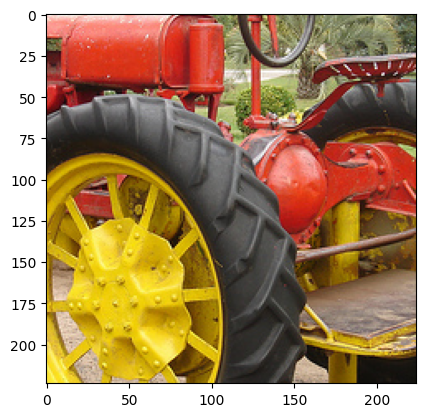

torch.return_types.max(
values=tensor([0.0755, 0.1584, 0.1203, 0.1763, 0.0759, 0.6796, 0.2355, 0.1562, 0.9167,
        0.1339, 0.2835, 0.1256, 0.2830, 0.3855, 0.8635, 0.0650, 0.2555, 0.8537,
        0.7732, 0.1503, 0.0437, 0.0267, 0.0520, 0.0840, 0.0682, 0.4272, 0.1336,
        0.4806, 0.2242, 0.8460, 0.1931, 0.2169, 0.1660, 0.1475, 0.1290, 0.2664,
        0.6798, 0.1201, 0.4467, 0.0613, 0.1272, 0.1410, 0.0705, 0.5705, 0.1877,
        0.0949, 0.1725, 0.2447, 0.0557, 0.2356, 0.4688, 0.4310, 0.0946, 0.2874,
        0.2230, 0.1891, 0.0504, 0.2936, 0.2007, 0.1563, 0.2293, 0.1164, 0.2913,
        0.2707, 0.2133, 0.1931, 0.1621, 0.2388, 0.2712, 0.1940, 0.0964, 0.2275,
        0.1301, 0.4479, 0.8758, 0.1530, 0.5800, 0.0917, 0.0654, 0.0737, 0.8862,
        0.1102, 0.0907, 0.1980, 0.4507, 0.2746, 0.1466, 0.2410, 0.0447, 0.1423,
        0.1280, 0.0607, 0.0767, 0.1575, 0.0801, 0.0847, 0.2919, 0.1297, 0.5522,
        0.0952]),
indices=tensor([966, 220, 360, 788, 975, 617, 440, 421, 470, 202, 112, 

In [40]:
for i, img in enumerate(os.listdir(cropped_imgs_path)):
    img_path = os.path.join(cropped_imgs_path, img)
    img = plt.imread(img_path)
    plt.imshow(img)
    # plt.title(f'Class: {np.argmax(y_pred[i])}')
    plt.show()
    idx = torch.argmax(scores[i], dim=-1)
    # threshold
    print(torch.max(torch.softmax(scores[i], dim =-1), dim=-1))
    keep_idx = torch.max(torch.softmax(scores[i], dim =-1), dim=-1)[0] > 0
    idx = idx[keep_idx]
    print(f'Class: {idx}')